In [43]:
import pdfplumber
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import numpy as np 
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer

NLP de metin için gerekli düzeltmeleri yaptıktan sonra. Metnin satır satır kelime kelime çalışma şeklimiz nasılsa buna uygun şekilde vektörlere çeviririz. 

In [2]:
with pdfplumber.open(r"F:\anlas\Python ile Makine Öğrenmesi\hitabe.pdf") as pdf:
    sayfa = pdf.pages[0]
    metin = sayfa.extract_text()
metin = metin.replace("!",".")

d1 = metin.split(".")

d2 = [i.replace("\n","").strip(" ") for i in d1]
print(d2)

["Atatürk'ün Gençliğe HitabesiEy Türk Gençliği", 'Birinci vazifen, Türk istiklâlini, Türk Cumhuriyetini, ilelebet, muhafaza vemüdafaa etmektir', 'Mevcudiyetinin ve istikbalinin yegâne temeli budur', 'Bu temel, senin, enkıymetli hazinendir', 'İstikbalde dahi, seni bu hazineden mahrum etmekisteyecek, dâhilî ve haricî bedhahların olacaktır', 'Bir gün, İstiklâl veCumhuriyeti müdafaa mecburiyetine düşersen, vazifeye atılmak için,içinde bulunacağın vaziyetin imkân ve şerâitini düşünmeyeceksin', 'Buimkân ve şerâit, çok namüsait bir mahiyette tezahür edebilir', 'İstiklâl veCumhuriyetine kastedecek düşmanlar, bütün dünyada emsaligörülmemiş bir galibiyetin mümessili olabilirler', 'Cebren ve hile ile azizvatanın, bütün kaleleri zapt edilmiş, bütün tersanelerine girilmiş, bütünorduları dağıtılmış ve memleketin her köşesi bilfiil işgal edilmiş olabilir', 'Bütün bu şerâitten daha elim ve daha vahim olmak üzere, memleketindahilinde, iktidara sahip olanlar gaflet ve dalâlet ve hatta hıyanet içindebulu

Tokenlaştırmak veya tokenization basitçe kelimeleri en küçük anlamlı parçalara ayırmak demektir.
Mesela "Merhaba Dünya" -> ["Merhaba","Dünya"] şeklinde ayırma işlemi. Bunun için ön işleme yapacağız
Sonrasında tokenizasyon yapacağız. Sonrasında Vektörizasyon yani bunları sayısal verilere çevireceğiz.
Bir nevi nabla operatoru yani gradyen bulmak gibi. Normalde skaler değerlerin türevi sıfırdır ama 
Değişimi tespit etmek için, gradyan hesap ederken nabla operatörü ile gradyen bulmaya benziyor. 

Word Tokenization (Kelime Tokenizasyonu): Metni kelimelere ayırma işlemi. Örneğin, "Merhaba dünya!" cümlesi ["Merhaba", "dünya"] olarak ayrılabilir.

Sentence Tokenization (Cümle Tokenizasyonu): Metni cümlelere ayırma işlemi. Örneğin, "Merhaba dünya! NLP harika bir alandır." metni ["Merhaba dünya!", "NLP harika bir alandır."] olarak ayrılabilir.

Özet olarak 
-----------
Tokenization: Metni daha küçük parçalara ayırma.

Vectorization: Bu parçaları sayısal vektörlere dönüştürme.


In [3]:
# Cümleleri tokenlaştırmak için ilk olarak bir dataframeye dönüştüreceğiz. 
df = pd.DataFrame(d2,columns=["Cümleler"])
df


Cümleler
0        Atatürk'ün Gençliğe HitabesiEy Türk Gençliği
1   Birinci vazifen, Türk istiklâlini, Türk Cumhur...
2   Mevcudiyetinin ve istikbalinin yegâne temeli b...
3              Bu temel, senin, enkıymetli hazinendir
4   İstikbalde dahi, seni bu hazineden mahrum etme...
5   Bir gün, İstiklâl veCumhuriyeti müdafaa mecbur...
6   Buimkân ve şerâit, çok namüsait bir mahiyette ...
7   İstiklâl veCumhuriyetine kastedecek düşmanlar,...
8   Cebren ve hile ile azizvatanın, bütün kaleleri...
9   Bütün bu şerâitten daha elim ve daha vahim olm...
10  Hatta bu iktidar sahipleri şahsî menfaatlerini...
11  Millet, fakr ü zaruret içinde harap vebîtap dü...
12                        Ey Türk istikbalinin evlâdı
13  İşte, bu ahval ve şerâit içinde dahi, vazifen;...
14  Muhtaç olduğun kudret,damarlarındaki asil kand...
15                  Mustafa Kemal Atatürk20 Ekim 1927

Burada yapılan işlemler tabi ham olarak gelen bir data içindi. Bu data web üzerinden kazınmış olabilir, bir kitap olabilir vs. vs. bir de hazır olarak gelebilecek veriler vardır. Bunlarla nasıl ilgilendiğimizi görelim. SMS veri kümemiz üzerinden görelim.

In [4]:
data = pd.read_csv(r"F:\anlas\Python ile Makine Öğrenmesi\spam.csv",encoding="cp1252")
data2 = data.copy()
data2.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [5]:
data2 = data2.iloc[:,[0,1]]
data2.columns = ["Etiket","SMS"]
data2

Etiket                                                SMS
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [6]:
# Normal string fonksiyonlarını regular expression yani düzenli ifadeler ile de kullanabiliriz. 
# Direkt olarak regular expression kütüphanesini de kullanabiliriz. 
data3 = data2["SMS"].str.replace(r"[^\w\s]","",regex=True) # Bunun anlamı \w -> Word ifadeleri \s -> Boşluk ifadeleri demektir 
                                               # Bu ifadeler dışındaki ifadeleri ortadan kaldırmak için replace fonksiyonu kulandık
print(data2.head(3))
print(data3.head(3)) # Çıktıda görüldüğü üzere 2 noktalar vs. silinmiş durumda. 

  Etiket                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
0    Go until jurong point crazy Available only in ...
1                              Ok lar Joking wif u oni
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: SMS, dtype: object


Noktalama işaretlerini silmek için re.sub() fonksiyonunu da kullanabiliriz. 
Ama genel olarak fonksiyonel yapılarda kullanılır. Tek tek çalıştığı için. 

"""
def puncRe(cumle):
    konum = re.compile("[^a-zA-Z]")
    return re.sub(konum," ",cumle)
print(data2["Sms"][0])
print(puncRe(data2["Sms"][0]))
"""

Bu şekilde fonksiyon halinde kullanmıştık ilk projede bilgi olarak buraya eklemiş olalım. 

Metinsel ifadelerle çalışırken cümle başındaki kelime büyük harf ile başlarken, Sonrasında kullanıldığında küçük harf ile devam eder bu durum frekans olarak ve değişken olarak düşündüğümüzde mesela "Kemal" ile "kemal" iki farklı veri olmuş olacak bizim için. Genelde bu durumlardan kaçınmak için hepsini str.lower() fonksiyonu kullanarak küçük harfe çevirerek işlem yapanlarda mevcut.

In [7]:
data3 = data3.str.lower()
print(data3.head(3)) # tümü artık küçük harfler olarak çıkmış oldu. 
data4 = data3.str.replace(r"[\d]","",regex=True)
print(data4.head(3)) # sayılardan kurtulmak için de decimal \d olanları replace yani yer 
              # değiştir ne ile "" bu karakter ile yapabiliriz.

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
Name: SMS, dtype: object
0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in  a wkly comp to win fa cup final...
Name: SMS, dtype: object


Etkisiz Kelimeler (Stop words) bir dilde çok sık kullanılan (Türkçe’de “bir”, “bu”, “şu” gibi) ve bu nedenle arama motorları tarafından gözardı edilen kelimelerdir. Arama motorlarının bu kelimeleri gözardı etmesinin sebebi hemen her yazıda geçtiklerinden ötürü arama sonuçlarına pozitif bir katkı sağlamamaları, hatta bu sonuçları negatif yönde etkileyip daha isabetsiz sonuçların dönmesine sebep olmalarıdır. Türkçe için daha önce 1.0 sürümü yayınladığımız listenin üzerinde bazı düzeltmeler yapıldı. Etkisiz kelimelerin her uygulamaya göre farklılık göstereceğini ve bu listenin yalnızca genel bir liste olduğunu hatırlatalım.

Not: Stop words kavramına karşılık olarak kullandığımız “etkisiz kelimeler” ifadesi kullanılmıştır. Alıntıdır. 

" a - acaba - altı - ama " kelimeleri genel olarak bağlaçlar vs. Bunlar için evrensel tek bir liste yok. Her dildeki geliştiriciler o dil için yaptıkları çalışmalar ve listeler oluşturulmuş. Haliyle Türkçe de de bunun için bir çok türevli yapılar oluşturulmuş.
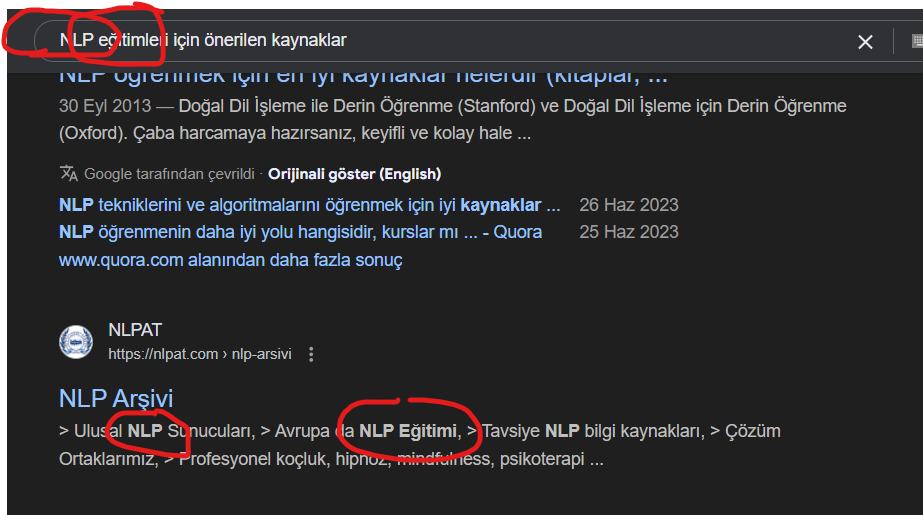 
Bu örnekte olduğu gibi Google da çok spesifik bir arama gerçekleştirdiğinizde bulamadığında. Öneriler kısmında geçmeyen kelimeleri belirtir. 

In [8]:
# İngilizce kelimeler için bir kütüphanede bunlar toplanmış Türkçe dili için çalışan NLP geliştiricileri
# çok fazla yok. En iyi hocalarımızdan biri Katar'da idi sanırım ismini unuttum :) 
# kütüphanemiz nltk 
import nltk 

from nltk.corpus import stopwords
nltk.download("stopwords")
print("how" in stopwords.words('english'))
# bu şekilde import edeceğiz. 

True


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kemal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Bunları kullanırken ilk olarak cümlelerimizi tokenlaştıracağız sonrasında bu tokenlar ( en küçük parçalar ) üzerinden stopwords içinde olanları tespit edip yok edeceğiz sonraısnda tekrar birleştireceğiz. Mnatıki olarak düşünürsek aslında basit. Mesela Nasıl veya How bu bir soru eki olduğu için her zaman kullanılabilir. Bunun bizim için manasını çözemeyiz gündelik hayattan derin konulara kadar bunlar dilin temel parçaları zaten o yüzden. Bunlar bizim için bilgi değeri taşımaz.

In [9]:
etkisiz = stopwords.words('english')
# parçalama 
splitted = data4.str.split()
print(splitted.head(3))

# Birleştirme 
merged = data4.apply(lambda x:" ".join(x for x in x.split() if x not in etkisiz))
print(merged.head(3)) # mesela until silindi. Comprehension ile tek satırda bu işlemi çözmüş olduk.
# çalıştığımız dil hangisi ise bununla ilgili stop words listelerini kullanarak bu şekilde 
# filtreleme işlemi yaparız. 

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
Name: SMS, dtype: object
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
Name: SMS, dtype: object


# STEMMERS

Stemmer'lar, bir kelimenin çeşitli çekimlenmiş biçimlerini (farklı hallerini) temel bir kök formuna (stem) indirger. Bu işlem, metin verilerini standartlaştırmak ve analiz etmek için gereklidir. Örneğin:

"running", "runs", "ran" -> "run"

"happily", "happiness" -> "happy"

## Neden Önemlidir?

Standartlaştırma: Farklı biçimlerde olan kelimeleri aynı kökte toplar ve metin analizlerini daha tutarlı hale getirir.

Boyut Azaltma: Kelime dağarcığını indirger, bu da model eğitiminde ve veri analizinde performansı artırır.

Anlam Koruma: Kelimenin temel anlamını koruyarak, dilsel analizleri daha doğru yapmanıza olanak tanır.

Bir çok stemmerlar var. Sadece NLTK kütüphanesinde olan bir kaçını kullanacağım.( Porterstemmer, Snowball Stemmer (Porter2), Lancaster Stemmer)



In [10]:
stemmer = PorterStemmer()
print(stemmer.stem("Waiting")) 
# bundan sonrası bunu al istediğin yere entegre et :D 
# apply ile istersen tüm sütuna uygula
temiz = []
for i in range(len(data2)):
    edited = re.sub("[^a-zA-Z]",' ',data2["SMS"][i]) # fonksiyon string alıyor data2["SMS"][i] o yüzden indexledik
    edited = edited.lower().split()
    edited = [stemmer.stem(kelime) for kelime in edited if not kelime in set(etkisiz)]
    temiz.append(' '.join(edited))

print(data2["SMS"][20])
print(temiz[20]) 
# Çıktıda olduğu gibi stop words ler atıldı ve seriously gibi türetilmiş kelimeler kök kelimeye çevrildi

data6 = pd.DataFrame(list(zip(data2["SMS"],temiz)),columns=["Orjinal SMS","Temiz SMS"])
data6.head(5)

wait
Is that seriously how you spell his name?
serious spell name


Orjinal SMS  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                           Temiz SMS  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

Stemmerları gördük, bu stemmerlar kelimeleri ayrıştırırken aldığı eklerle yapısal değişimler yaşayan kelimelerde mesela study -> studies early -> earlies gibi ekleri silme işlemi yaptığı zaman kelimenin kökünü yanlış buluyor ve studi veya earli gibi kalıyor bir önceki örnekte görüldüğü gibi. Burada Lemmatization işlemi kullanacağız. Bu da bazen hatalar yapabilir ama en azından daha iyi sonuç veriyor. 

In [11]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kemal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Lemmatizer'ı oluşturuyoruz 
lemmatizer = WordNetLemmatizer()

temiz2 = []
for i in range(len(data2)):
    edited = re.sub("[^a-zA-Z]",' ',data2["SMS"][i]) # fonksiyon string alıyor data2["SMS"][i] o yüzden indexledik
    edited = edited.lower().split()
    edited = [lemmatizer.lemmatize(kelime) for kelime in edited if not kelime in set(etkisiz)]
    temiz2.append(' '.join(edited))

print(data2["SMS"][20])
print(temiz[20]) 

data6 = pd.DataFrame(list(zip(data2["SMS"],temiz2)),columns=["Orjinal SMS","Temiz SMS"])
print(data2.iloc[0])
print(temiz2[0]) # crazi olarak çalışıyordu şimdi crazy olarak çalıştı

Is that seriously how you spell his name?
serious spell name
Etiket                                                  ham
SMS       Go until jurong point, crazy.. Available only ...
Name: 0, dtype: object
go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [13]:
frekans = (data6["Temiz SMS"]).apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
frekans

C:\Users\kemal\AppData\Local\Temp\ipykernel_10108\982014507.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frekans = (data6["Temiz SMS"]).apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\kemal\AppData\Local\Temp\ipykernel_10108\982014507.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  frekans = (data6["Temiz SMS"]).apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\kemal\AppData\Local\Temp\ipykernel_10108\982014507.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frekans = (data6["Temiz SMS"]).apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
C:\Users\kemal\AppData\Local\Temp\ipykernel_10108\982014507.py:1: 

index      0
0            go  312.0
1        jurong    1.0
2         point   33.0
3         crazy   15.0
4     available   18.0
...         ...    ...
7041       heap    1.0
7042      lowes    1.0
7043   salesman    1.0
7044       pity    1.0
7045   bitching    1.0

[7046 rows x 2 columns]

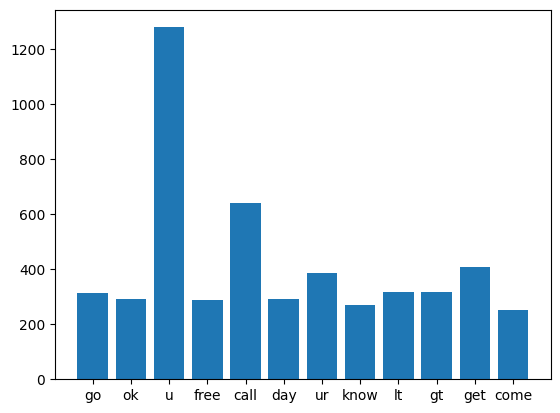

In [14]:
frekans.columns = ["Kelimeler","Frekans"]
filtre = frekans[frekans["Frekans"]>250] # çok uzun sürdü o yüzden filtreleyerek en azından görelim
plt.bar(x="Kelimeler",height="Frekans",data=filtre)
plt.show()

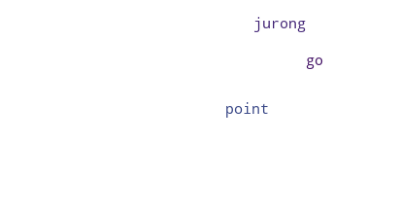

In [22]:
plt.figure(figsize=(5,5))
wordcloud = WordCloud(background_color="White",max_words=3,max_font_size=15).generate(data6["Temiz SMS"][0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

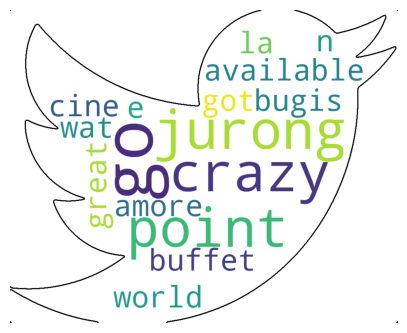

In [35]:
image =np.array(Image.open(r"F:\anlas\Python ile Makine Öğrenmesi\word-cloud-mask-300x300.png"))
plt.figure(figsize=(5,5))
wordcloud = WordCloud(background_color="White",max_words=20,mask=image,contour_width=3).generate(data6["Temiz SMS"][0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

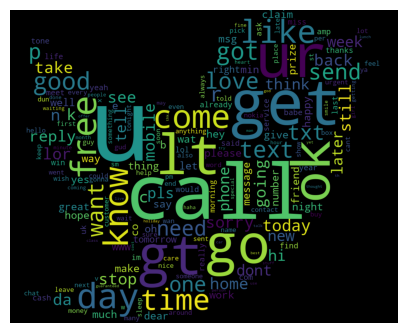

In [42]:
# Frekansları vermek için generate fonksiyonundan başka bir fonksiyon ve 
# Frekans dataframesini bir sözlük şeklinde vermemiz gerekiyor 
image =np.array(Image.open(r"F:\anlas\Python ile Makine Öğrenmesi\word-cloud-mask-300x300.png"))
plt.figure(figsize=(5,5))
wordcloud = WordCloud(background_color="Black",mask=image,contour_width=3).generate_from_frequencies(dict(frekans.values))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Şimdi vektörleştirme yapabiliriz. Burada kullanacağımız fonksiyon yapısı yukarıda pratik olarak yaptığımız uygulamaları kendisi otomatik olarak da alabiliyor stop words vs. Tüm kelimeleri bir vektör haline getirdiğimiz bu süreç aslında sadece kelimelerin frekanslarını tek bir matrixde birleştirerek bu frekanslar üzerinden bir vektör oluşturuyor. Burada ekstra olarak çok fazla kelime var gibi gelebilir aslında bu çok küçük bir veri kümesi çok daha fazlasını ileride örnek olarak yapacağım. Bu giriş niteliğinde bir not olarak saklayacağım için böyle küçük bir veri kümesini kullanıyorum. Burada yaptığımız işlemde ayrıca çok küçük desek bile yine de şunu belirtmek lazım optimal durumlar bizim için her zaman en iyisidir. O yüzden veri kümesi büyük diye her şeyi kullanmanın anlamı yok. Stop words bu yüzden oluşturuldu zaten. Burada ekstra bu mantık ile en çok kullanılan kelimeleri kullanarak çalıştığımız zaman modellerimizde çok büyük farklılıklar olmaz o yüzden böyle yerlerde en çok kullan belli kelimeler alınır ki gereksiz hesaplama yükü oluşturmayalım. 

In [52]:
countVectorExtractor = CountVectorizer()

matrix= countVectorExtractor.fit_transform(temiz).toarray()
print(matrix)
matrixDf = pd.DataFrame(matrix,columns=countVectorExtractor.get_feature_names_out())
matrixDf.head(5)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


aa  aah  aaniy  aaooooright  aathi  ab  abbey  abdomen  abeg  abel  ...  \
0   0    0      0            0      0   0      0        0     0     0  ...   
1   0    0      0            0      0   0      0        0     0     0  ...   
2   0    0      0            0      0   0      0        0     0     0  ...   
3   0    0      0            0      0   0      0        0     0     0  ...   
4   0    0      0            0      0   0      0        0     0     0  ...   

   zero  zf  zhong  zindgi  zoe  zogtoriu  zoom  zouk  zs  zyada  
0     0   0      0       0    0         0     0     0   0      0  
1     0   0      0       0    0         0     0     0   0      0  
2     0   0      0       0    0         0     0     0   0      0  
3     0   0      0       0    0         0     0     0   0      0  
4     0   0      0       0    0         0     0     0   0      0  

[5 rows x 6221 columns]